## ΑΣΚΗΣΗ 3).

In [7]:
import pandas as pd 

# Reading a CSV file into a pandas DataFrame
df = pd.read_csv("../data/survey_data_2023.csv")

# This file analyzes the dataset in the file survey_data_2023.csv !!!

I am going to find how the following two numerical variables are associated with each other (if at all) from the file: survey_data.csv :

The variables I am analyzing are: 'Height' & 'Weight'


In [8]:
# First off, clean the data by dropping unnecessary columns
df = df.drop(['music', 'os', 'gender', 'math', 'prob', 'shoe', 'month', 'color', 'pet', 'number'], axis=1)

# Then, drop rows with missing values
df = df.dropna()

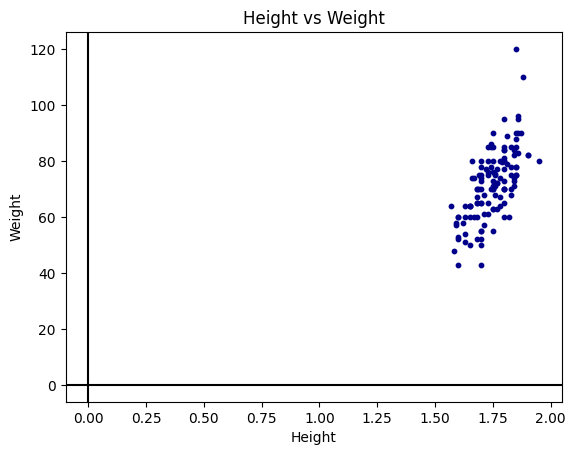

In [9]:
import matplotlib.pyplot as plt

ax = df.plot.scatter(x='height', y='weight', c='DarkBlue', s=10)
ax.set_xlabel("Height")
ax.set_ylabel("Weight")
ax.set_title("Height vs Weight")
ax.axhline(0, color='black', linestyle='-')
ax.axvline(0, color='black', linestyle='-')
#plt.xlim(0, 2)
#plt.ylim(40, 120)

In [17]:
# Corelation between height and weight
corr = df['height'].corr(df['weight'])
print("Correlation between height and weight: ", corr.round(5), " (rounded at 5 decimal places)")

Correlation between height and weight:  0.67189  (rounded at 5 decimal places)


Οι μεταβλητές 'Height' και 'Weight' είναι θετικά συσχετισμένες σε έντονο βαθμό, καθώς ο συντελεστής συσχέτισης είναι θετικός και ίσος με 0.67189.
Ένας αριθμός κοντά στο 1.


In [18]:
import sklearn as sk

# Do Linear Regression using Least Squares Method
predictors = df['height']
outcome = df['weight']

model = sk.linear_model.LinearRegression()
model.fit(predictors.values.reshape(-1,1), outcome.values.reshape(-1,1))

LinearRegression()

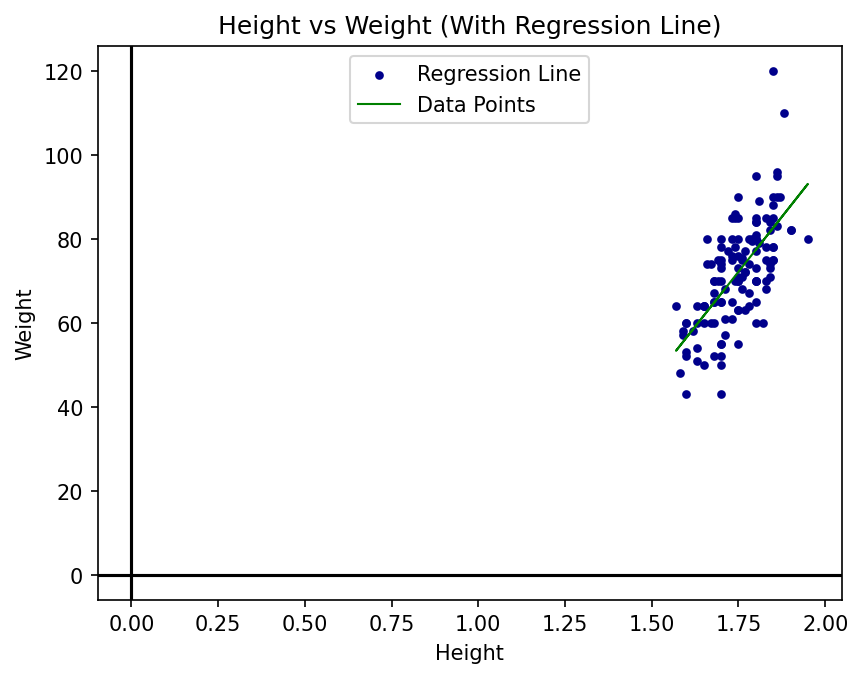

In [50]:
# Plot the regression line

plt.figure(dpi=150) 
plt.scatter(predictors, outcome, color='darkblue', s=10)
plt.plot(predictors, model.predict(predictors.values.reshape(-1,1)), color='green', linewidth=1)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight (With Regression Line)")
plt.axhline(0, color='black', linestyle='-')
plt.axvline(0, color='black', linestyle='-')
plt.legend(['Regression Line', 'Data Points'])
#plt.xlim(0, 2)
#plt.ylim(40, 120)
plt.show()